In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions

df = project_functions.load_and_process('..\..\data\data_raw\*.csv')
df.columns

Index(['language', 'review', 'timestamp_created', 'timestamp_updated',
       'recommended', 'votes_up', 'votes_funny', 'steam_algorithm_score',
       'comment_count', 'received_for_free', 'written_during_early_access',
       'num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'playtime_at_review', 'last_played',
       'game_id'],
      dtype='object')

# Comparing word choice to number of review comments

An interesting question that arose while conducting our exploratory dataset analysis was whether a reviewer's word choice would garner feedback from other reviewers. Were there specific words that would target or trigger a certain response?

To begin this analysis, 

In [2]:
rev_comments = df[['review', 'comment_count']]

data = pd.DataFrame({
    'Review': rev_comments['review'],
    'Comment Count': pd.to_numeric(rev_comments['comment_count'])
})
data

,Review,Comment Count
0,always a good game but i think that they could...,0
1,its fun,0
2,rip cade-6,0
3,I got the free version of Destiny 2 just to tr...,0
4,BAD GAME FOR PEOPLE WHO LIKE YOU KNOW,0
...,...,...
17619,Its good enough to buy it first on epic then o...,0
17620,Can finally play it on an actual platform that...,0
17621,Epic Store is pure poison and i will never sup...,30
17622,"6 months late, but exactly what I was looking ...",5


In [23]:
filtered_rev = data[data['Comment Count'] > 0]
filtered_rev

,Review,Comment Count
51,"Shit game, shit developers.Complete and utter ...",1
235,Awesome game to play with friends and with an ...,6
249,Destiny 2 has come a long way since launch. it...,1
267,a game you will hate so much but can't stop pl...,1
281,"Haven't played very much of the game, seems re...",2
...,...,...
17605,Finally i can play this game,2
17611,Can´t believe catastrophe struck when Randy Pi...,2
17618,"So far so good.\nThanks to ""Epic"" beta testing...",27
17621,Epic Store is pure poison and i will never sup...,30


['yes', 'good', 'good game', 'its ok', 'nice', 'bad', 'very good game', 'no', 'great game', 'gud'] [59, 29, 26, 18, 12, 12, 11, 9, 9, 8]


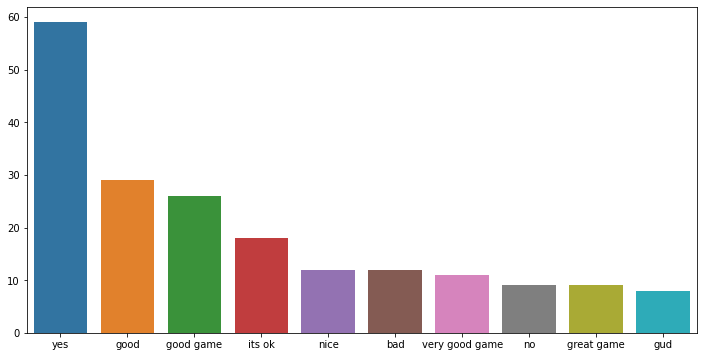

In [25]:
top_words = filtered_rev['Review'].apply(lambda x: str(x).lower().strip())

count = Counter(top_words)
top = dict(count.most_common(10))
reviews = list(top.keys())
counts = list(top.values())
print(reviews, counts)

plt.figure(figsize=(12,6))
rtplot = sns.barplot(x=reviews, y=counts)

In [6]:
sorted_rev = filtered_rev.sort_values(['Comment Count'], ascending=False)
sorted_rev

,Review,Comment Count
55351,This game saved my life.\n\nI am 27.\n\nMy ex-...,176
8085,There are a few pluses to this game:\n[list]\n...,165
22200,"It shows that I've ""played"" for 28 hours, but ...",154
36981,Didn't play that long. Seems like a good game ...,141
28690,"Well it's sad it's come to this, but I have to...",136
...,...,...
3327,Developers finally got a small part of what th...,1
21091,I completed the story on Ps4 and decided to ...,1
3239,Basically a must have if you have a hmd. The g...,1
3211,haha boxes go brrrr,1


In [26]:
over100 = data[data['Comment Count'] > 100]
over100

,Review,Comment Count
22200,"It shows that I've ""played"" for 28 hours, but ...",154
28690,"Well it's sad it's come to this, but I have to...",136
32102,1. Game opens the rockstar launcher.\n2. Rocks...,120
32809,Requires Rockstar Games Launcher. Crashes on s...,110
33299,just hope they don't ruin the online by adding...,117
8319,I recommend you do a thorough amount of resear...,105
55351,This game saved my life.\n\nI am 27.\n\nMy ex-...,176
8085,There are a few pluses to this game:\n[list]\n...,165
23598,I can't recommend this game for the particular...,108
26006,"-EDIT-\nOn the 25th of March,1 month after my ...",104
